<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

HACK CHALLENGE

</center></font></h1>
<h2><font color='0B5345'> <center>
Reto ciencia de datos</center></font></h2>
<font  face="Courier New" size="3">
<p2> <center>Isabella Ariza - Eduardo Montoya - Juliana Moreno - Santiago Gonzalez - Luisa Zapata</center></p2>
<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

### Análisis exploratorio

In [1]:
# Importar librerías para visualización y gestión de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# # Librerías para generar el modelo

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("Occupancy_Estimation.csv",sep=",")
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [7]:
print(f'El números de registros es {data.shape[0]} y variables es {data.shape[1]}')


El números de registros es 10129 y variables es 19


### Limpieza de datos

In [8]:
## Verificación de filas o columnas vacias
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

### Análisis descriptivo

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


### Distribuciones de probabilidad

16


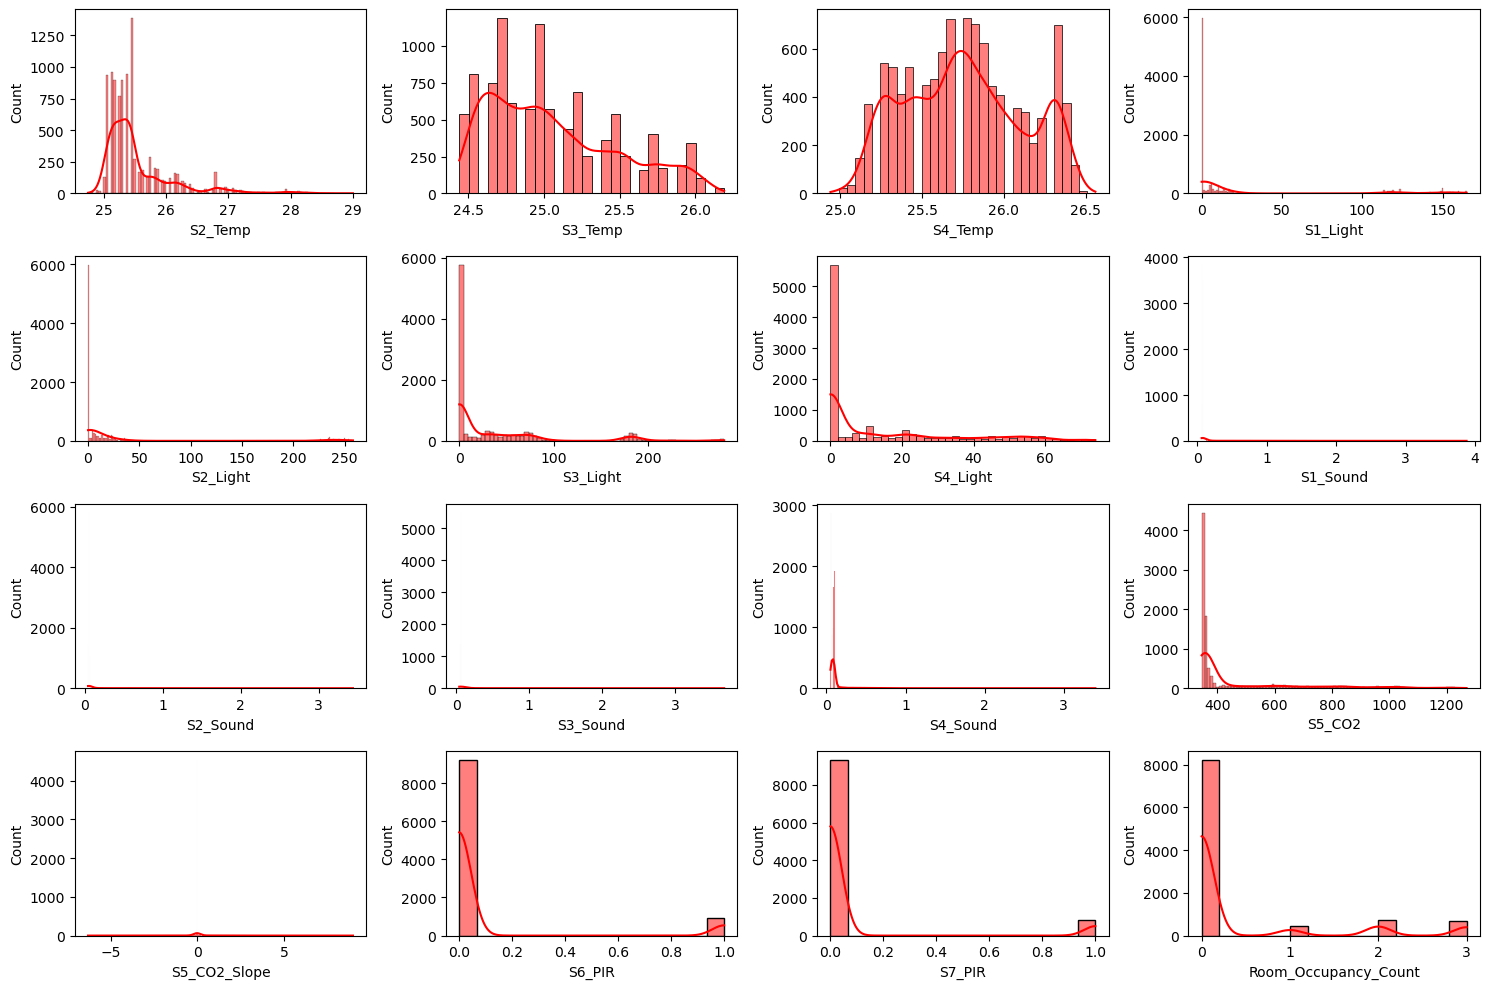

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(15, 10))

columnas = data.columns.tolist()
columnas = columnas[3:]
print(len(columnas))

for i, columna in enumerate(columnas):
    fila = i // 4
    col = i % 4
    sns.histplot(data[columna], kde = True,color='r',ax=axes[fila, col])
plt.tight_layout()

plt.show()


In [5]:
data_n = data.drop(["Date","Time"], axis=1)

In [6]:
data_n

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [7]:
scaler =StandardScaler()

In [8]:
df_estand = scaler.fit_transform(data_n)

In [9]:
df_estand = pd.DataFrame(df_estand,columns=data_n.columns)

In [10]:
df_estand

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,-0.314749,-0.294029,0.673063
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,-0.314749,-0.294029,0.673063
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,-0.314749,-0.294029,0.673063
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,-0.314749,-0.294029,0.673063
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,-0.314749,-0.294029,0.673063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,-1.121477,-0.709639,-0.858071,-1.246084,-0.381210,-0.282556,-0.021379,0.447917,-0.246855,-0.300448,-0.237223,-0.197556,-0.579432,0.004146,-0.314749,-0.294029,-0.446020
10125,-1.121477,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.310008,-0.262923,-0.261400,-0.197556,-0.579432,0.004146,-0.314749,-0.294029,-0.446020
10126,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.183703,-0.262923,-0.237223,-0.197556,-0.579432,0.004146,-0.314749,-0.294029,-0.446020
10127,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.278432,-0.150348,-0.140515,-0.197556,-0.579432,0.004146,-0.314749,-0.294029,-0.446020


In [38]:
df_estand.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
pca = PCA(n_components=17)
p_components  = pca.fit(df_estand)

In [29]:
loadings = pca.components_
for i, pc_loadings in enumerate(loadings):
    print(f"Loadings for PC{i + 1}:")
    for j, variable_loading in enumerate(pc_loadings):
        print(f"Variable {j + 1}: {variable_loading:.4f}")

Loadings for PC1:
Variable 1: 0.2742
Variable 2: 0.2659
Variable 3: 0.2623
Variable 4: 0.2387
Variable 5: 0.2920
Variable 6: 0.2700
Variable 7: 0.2836
Variable 8: 0.1562
Variable 9: 0.2228
Variable 10: 0.2145
Variable 11: 0.2195
Variable 12: 0.1999
Variable 13: 0.2542
Variable 14: 0.1528
Variable 15: 0.2241
Variable 16: 0.2338
Variable 17: 0.2979
Loadings for PC2:
Variable 1: -0.3474
Variable 2: -0.2272
Variable 3: -0.3790
Variable 4: -0.3626
Variable 5: 0.0642
Variable 6: 0.1102
Variable 7: 0.0178
Variable 8: 0.0625
Variable 9: 0.2079
Variable 10: 0.2585
Variable 11: 0.1921
Variable 12: 0.2542
Variable 13: -0.3147
Variable 14: 0.3941
Variable 15: 0.1745
Variable 16: 0.1705
Variable 17: 0.0816
Loadings for PC3:
Variable 1: 0.1115
Variable 2: -0.0124
Variable 3: 0.0629
Variable 4: -0.0327
Variable 5: -0.2369
Variable 6: -0.2451
Variable 7: -0.1976
Variable 8: -0.5457
Variable 9: 0.1785
Variable 10: 0.1817
Variable 11: 0.4152
Variable 12: 0.4199
Variable 13: 0.1530
Variable 14: -0.2533
V

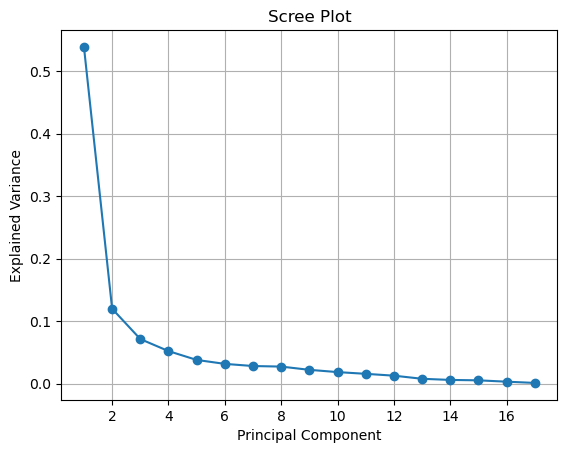

In [30]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

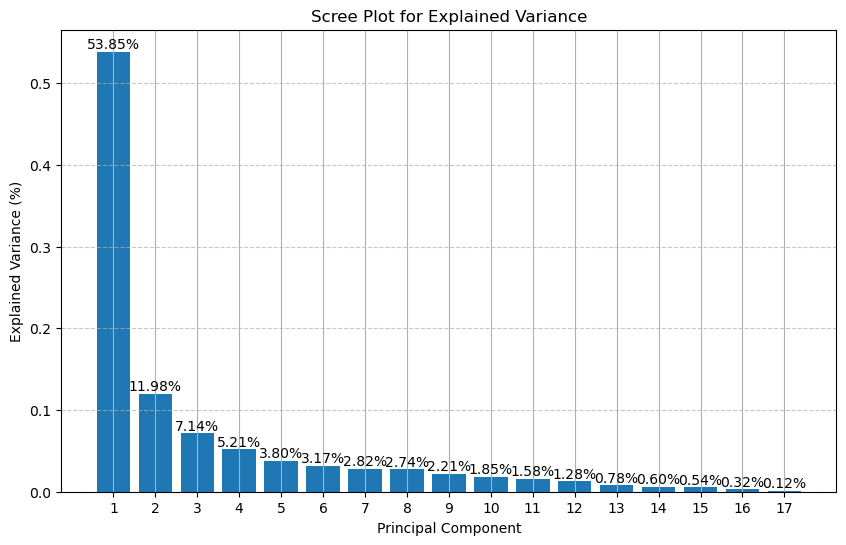

In [22]:
plt.figure (figsize=(10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot for Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)

# Add labels on top of each bin
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
eigenvalues = pca.explained_variance_
print("eigenvalues:",eigenvalues)

eigenvalues: [9.15487809 2.03744766 1.21324031 0.88623507 0.64586851 0.53868613
 0.48025774 0.46506061 0.37657549 0.3152617  0.26811248 0.21796042
 0.13330388 0.10227358 0.0911038  0.05452132 0.02089172]


In [37]:
eigenvectors = pca.components_

print("Eigenvectors (Principal Components):")
print(eigenvectors)

Eigenvectors (Principal Components):
[[ 0.27420792  0.26593293  0.26226824  0.23865798  0.29202727  0.26998981
   0.28356482  0.15624986  0.22276726  0.21449312  0.21948816  0.19992169
   0.25417432  0.15276258  0.22407646  0.23384863  0.297888  ]
 [-0.34736716 -0.22717372 -0.37899944 -0.36258992  0.06422331  0.11023919
   0.01784454  0.06247556  0.20792981  0.25845738  0.19208348  0.25422316
  -0.31468988  0.39412846  0.17453821  0.17047411  0.08163773]
 [ 0.11148448 -0.01236737  0.06286919 -0.03269723 -0.23693235 -0.24508062
  -0.19762926 -0.54571793  0.17848293  0.18173004  0.41517723  0.41994629
   0.15302068 -0.25334322 -0.03451669  0.11946801 -0.11251076]
 [-0.09227574  0.01034374 -0.00191971  0.17554897 -0.02841644 -0.10145839
   0.06855748  0.61630842  0.21648372  0.20659914  0.13940163  0.29778773
  -0.17097722 -0.39791042 -0.10164994 -0.29394664 -0.28802355]
 [ 0.00306696 -0.09168152  0.03607955  0.09652807  0.01219353 -0.04883841
   0.3187471   0.01086691 -0.25958402 -0.2635

In [53]:
pca2 = PCA(n_components=5)
p_components  = pca2.fit(df_estand)

In [54]:
loadings2 = pca2.components_
for i, pc_loadings in enumerate(loadings2):
    print(f"Loadings for PC{i + 1}:")
    for j, variable_loading in enumerate(pc_loadings):
        print(f"{df_estand.columns.tolist()[j]} {j + 1}: {variable_loading:.4f}")

Loadings for PC1:
S1_Temp 1: 0.2742
S2_Temp 2: 0.2659
S3_Temp 3: 0.2623
S4_Temp 4: 0.2387
S1_Light 5: 0.2920
S2_Light 6: 0.2700
S3_Light 7: 0.2836
S4_Light 8: 0.1562
S1_Sound 9: 0.2228
S2_Sound 10: 0.2145
S3_Sound 11: 0.2195
S4_Sound 12: 0.1999
S5_CO2 13: 0.2542
S5_CO2_Slope 14: 0.1528
S6_PIR 15: 0.2241
S7_PIR 16: 0.2338
Room_Occupancy_Count 17: 0.2979
Loadings for PC2:
S1_Temp 1: -0.3474
S2_Temp 2: -0.2272
S3_Temp 3: -0.3790
S4_Temp 4: -0.3626
S1_Light 5: 0.0642
S2_Light 6: 0.1102
S3_Light 7: 0.0178
S4_Light 8: 0.0625
S1_Sound 9: 0.2079
S2_Sound 10: 0.2585
S3_Sound 11: 0.1921
S4_Sound 12: 0.2542
S5_CO2 13: -0.3147
S5_CO2_Slope 14: 0.3941
S6_PIR 15: 0.1745
S7_PIR 16: 0.1705
Room_Occupancy_Count 17: 0.0816
Loadings for PC3:
S1_Temp 1: 0.1115
S2_Temp 2: -0.0124
S3_Temp 3: 0.0629
S4_Temp 4: -0.0327
S1_Light 5: -0.2369
S2_Light 6: -0.2451
S3_Light 7: -0.1976
S4_Light 8: -0.5457
S1_Sound 9: 0.1785
S2_Sound 10: 0.1817
S3_Sound 11: 0.4152
S4_Sound 12: 0.4199
S5_CO2 13: 0.1530
S5_CO2_Slope 14:

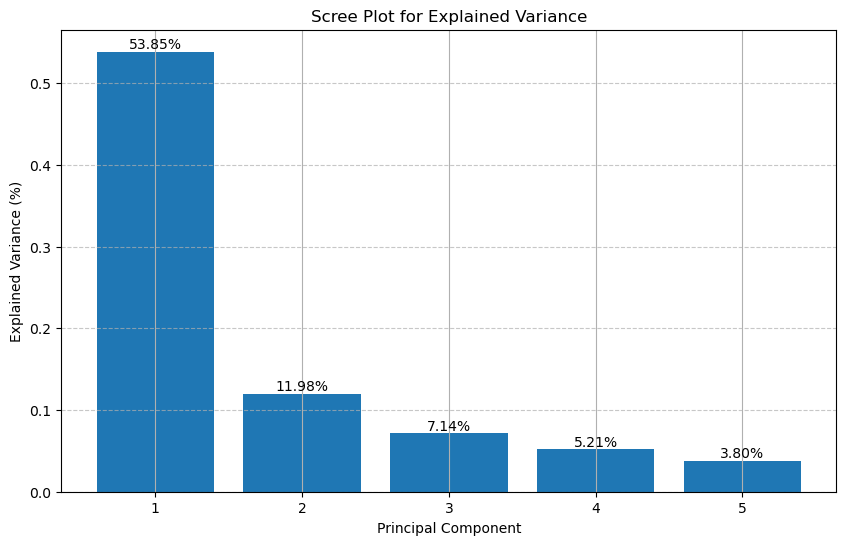

In [55]:
explained_variance2 = pca2.explained_variance_ratio_
plt.figure (figsize=(10,6))
plt.bar(range(1, len(explained_variance2) + 1), explained_variance2)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot for Explained Variance')
plt.xticks(range(1, len(explained_variance2) + 1))
plt.grid(True)

# Add labels on top of each bin
for i, ratio in enumerate(explained_variance2):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

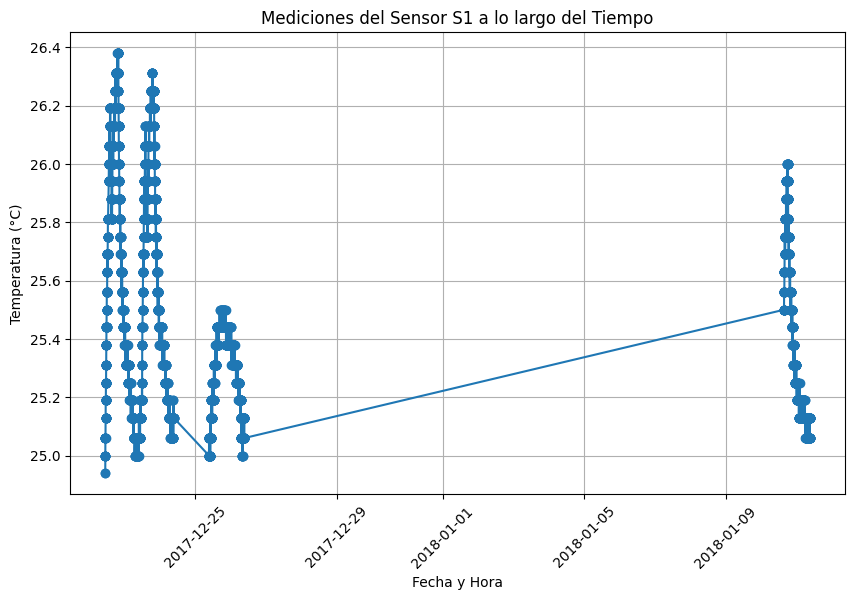

In [16]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Ordenar los datos por la columna 'DateTime' (en caso de que no estén ordenados)
data = data.sort_values('DateTime')

# Graficar la medida del sensor en función del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['DateTime'], data['S1_Temp'], marker='o', linestyle='-')
plt.title('Mediciones del Sensor S1 a lo largo del Tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)  # Rotar los valores del eje x para mejorar la legibilidad
plt.grid(True)
plt.show()

### Tratamiento de valores en cero

In [100]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Numero de observaciones menores o iguales a cero en la columna {} son {}".format(col,zero_values))

Numero de observaciones menores o iguales a cero en la columna Glucose son 5
Numero de observaciones menores o iguales a cero en la columna BloodPressure son 35
Numero de observaciones menores o iguales a cero en la columna SkinThickness son 227
Numero de observaciones menores o iguales a cero en la columna Insulin son 374
Numero de observaciones menores o iguales a cero en la columna BMI son 11


No tiene sentido que  estas variables tengan valores en cero, sin embargo no se quiere perder estos datos, una opción es reemplazar los valores en cero por la mediana de esa variables.

In [101]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    median = data[col].median()
    data.loc[data[col]<=0,col] = median

In [102]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Numero de observaciones menores o iguales a cero en la columna {} son {}".format(col,zero_values))

Numero de observaciones menores o iguales a cero en la columna Glucose son 0
Numero de observaciones menores o iguales a cero en la columna BloodPressure son 0
Numero de observaciones menores o iguales a cero en la columna SkinThickness son 0
Numero de observaciones menores o iguales a cero en la columna Insulin son 0
Numero de observaciones menores o iguales a cero en la columna BMI son 0


### Detección de datos atípicos

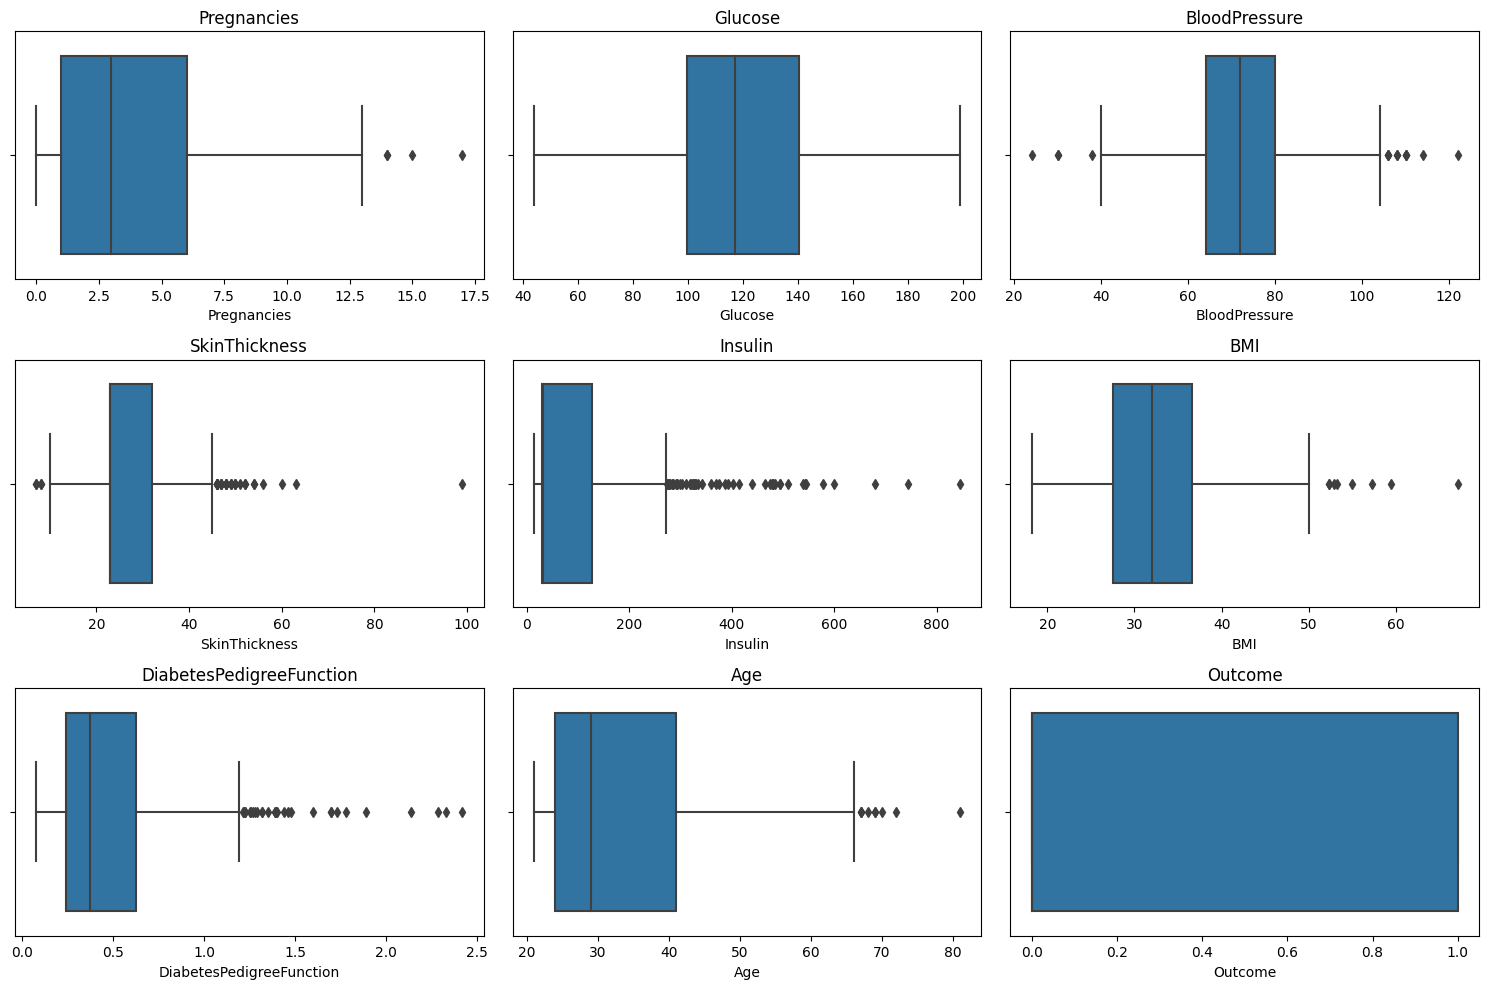

In [103]:
int_vars = data.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=data,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [104]:
outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',
                        'DiabetesPedigreeFunction','Age']

##### Función para eliminar datos atípicos

In [105]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [106]:
for i in data.columns:
    data[i]=remove_outliers_iqr(data[i])

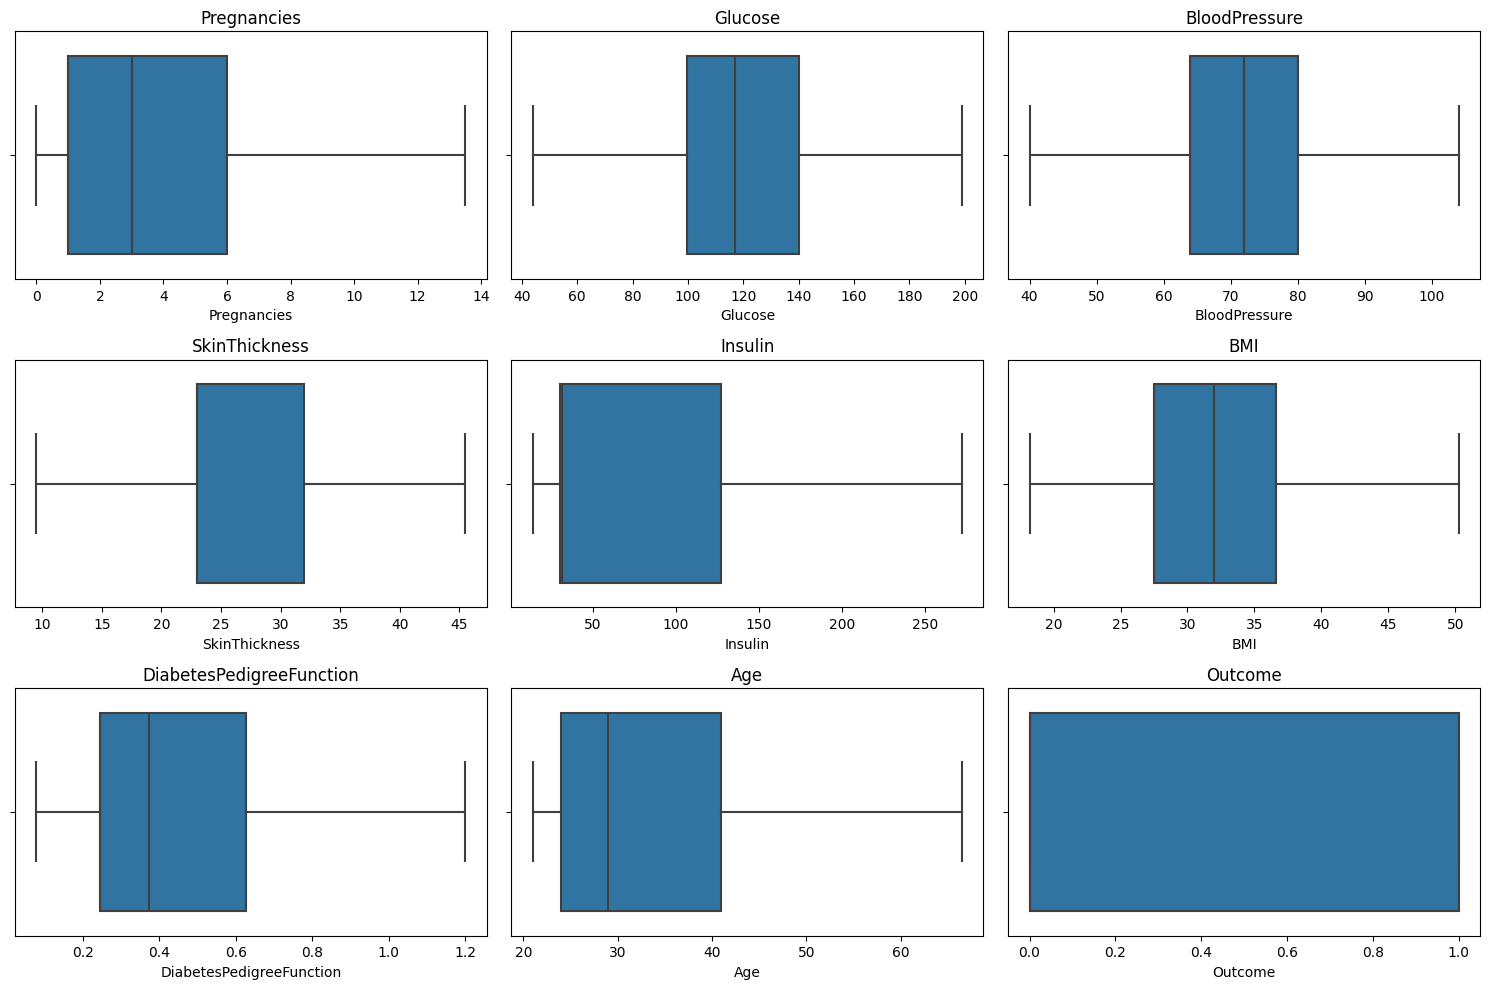

In [107]:
int_vars = data.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (data):
    sns.boxplot(x=var,data=data,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

### Matriz de correlación

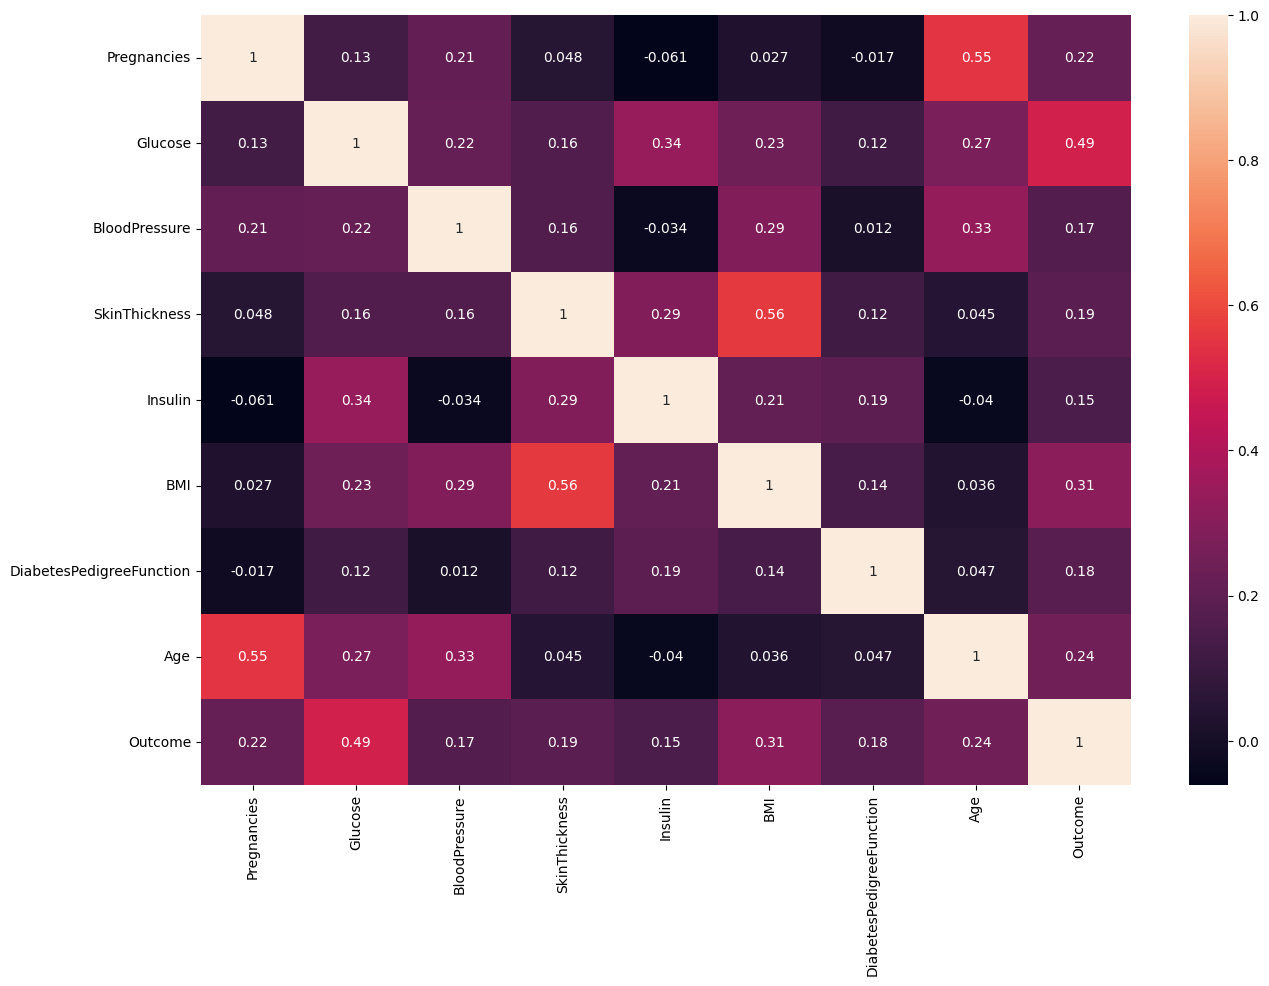

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),fmt='.2g',annot=True)
plt.show()

### **Cálculo de métricas de evaluación**
_________________________

<p align="center">
  <img src="https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" alt="Matriz de confusión">
</p>

In [113]:
# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred)
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_pred)
# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.73
Precisión: 0.72
Recall: 0.49
F1-score: 0.59
